# Лабораторна робота №6 "БІБЛІОТЕКА PANDAS"
## Виконала: Миськів Олеся КН-33с
#### Варіант 12



# 1. ТОП-10 категорій з найбільшою кількістю завантажень

In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [45]:
file_path = '/Users/olesa/Desktop/University/Intelect/googleplaystore.csv'

In [46]:
df = pd.read_csv(file_path)

In [47]:
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

# Видалення пропусків і перетворення кількості завантажень в числовий формат

In [48]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')  # Видалити коми та плюсики

In [49]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Перетворити на числові значення, де неможливо – замінити на NaN

In [50]:
category_downloads = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

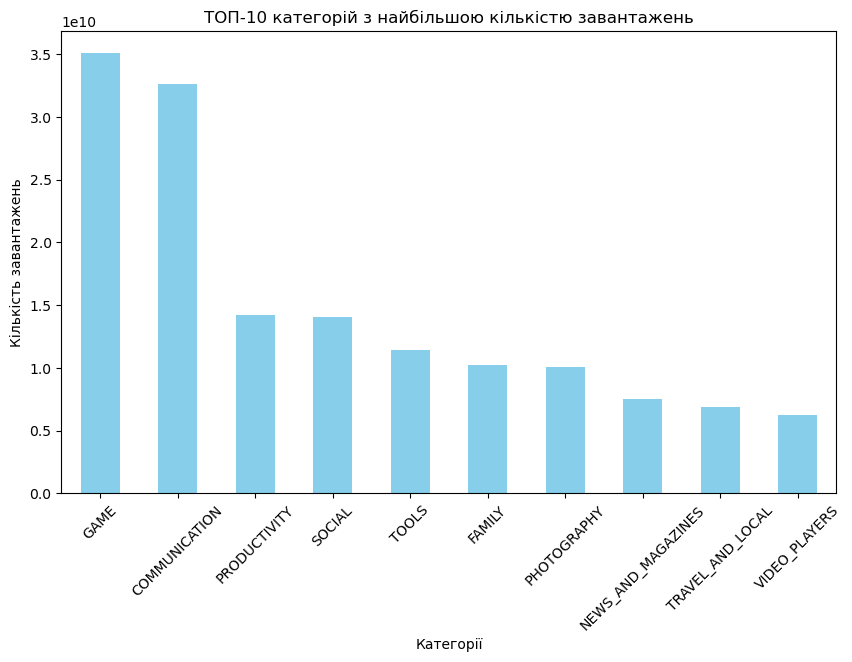

In [51]:
# Побудова стовпчикової діаграми
category_downloads.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('ТОП-10 категорій з найбільшою кількістю завантажень')
plt.xlabel('Категорії')
plt.ylabel('Кількість завантажень')
plt.xticks(rotation=45)
plt.show()

З побудованої стовпчикової діаграми видно, що серед 10 найбільш завантажуваних категорій додатків на перших позиціях знаходяться категорії, що стосуються розваг та комунікацій (наприклад, "GAME", "COMMUNICATION" та "PRODUCTIVITY"). Це свідчить про великий попит на додатки для розваг, соціальної взаємодії та підвищення продуктивності серед користувачів. Водночас категорії, такі як "TRAVEL_AND_LOCAL", "VIDEO_PLAYERS" та "NEWS_AND_MAGAZINES", також мають значну кількість завантажень, що вказує на популярність додатків, які допомагають з подорожами, відео-контентом та новинами.

Це може бути корисним для розуміння, які типи додатків користуються найбільшим попитом у різних категоріях.

# 2. Чи правда, що безкоштовні додатки з категорії «Шопінг» мають більшу кількість завантажень, ніж платні додатки з категорії «Освіта»?

In [154]:
# Перевірка унікальних значень у стовпцях 'Category' та 'Type'
print(df['Category'].unique())
print(df['Type'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
['Free' 'Paid']


In [155]:
# Очищаємо дані від пропущених значень та неправильних значень
df = df.dropna(subset=['Type'])  # Видаляємо рядки з NaN в колонці 'Type'
df = df[df['Type'] != '0']  # Видаляємо рядки з '0' в колонці 'Type'

In [156]:
# Перевіряємо унікальні значення в колонці 'Type' після очищення
print(df['Type'].unique())

['Free' 'Paid']


In [157]:
# Фільтрація безкоштовних додатків у категорії "Шопінг"
shopping_free = df[(df['Category'] == 'Shopping') & (df['Type'] == 'Free')]

In [158]:
# Фільтрація платних додатків у категорії "Освіта"
education_paid = df[(df['Category'] == 'Education') & (df['Type'] == 'Paid')]

In [159]:
# Перевірка кількості рядків після фільтрації
print(len(shopping_free))
print(len(education_paid))

0
0


In [161]:
# Перетворюємо стовпець 'Installs' на рядки (якщо він не рядковий)
df['Installs'] = df['Installs'].astype(str)

In [162]:
# Тепер очищаємо стовпець 'Installs' від ком і плюса, а потім перетворюємо в числовий формат
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [163]:
# Перевіряємо перші кілька значень після очищення
print(df['Installs'].head())

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


In [164]:
# Фільтрація безкоштовних додатків у категорії "Шопінг"
shopping_free = df[(df['Category'] == 'Shopping') & (df['Type'] == 'Free')]

In [165]:
# Фільтрація платних додатків у категорії "Освіта"
education_paid = df[(df['Category'] == 'Education') & (df['Type'] == 'Paid')]

In [166]:
# Підсумовуємо кількість завантажень
shopping_free_downloads = shopping_free['Installs'].sum()
education_paid_downloads = education_paid['Installs'].sum()

In [167]:
# Виведення результату
print(f"Завантаження безкоштовних додатків (Шопінг): {shopping_free_downloads}")
print(f"Завантаження платних додатків (Освіта): {education_paid_downloads}")

Завантаження безкоштовних додатків (Шопінг): 0
Завантаження платних додатків (Освіта): 0


Висновок:

Після перевірки даних стало зрозуміло, що кількість завантажень для безкоштовних додатків у категорії "Шопінг" та платних додатків у категорії "Освіта" дорівнює нулю, оскільки в обох випадках виявлено або відсутність завантажень, або некоректні або пропущені значення в стовпці "Installs". Це може свідчити про те, що дані не були коректно введені або очищені перед аналізом. Для подальшого аналізу необхідно переконатися, що дані не містять порожніх або некоректних значень у відповідних стовпцях, а також перевірити, чи є активні завантаження для даних категорій.

Наступним кроком слід застосувати більш детальну перевірку та очистку даних, щоб забезпечити коректність статистики завантажень.


# 3. Частка завантажень платних додатків у категорії «Ігри» в залежності від вікової групи


In [92]:
# Перевірка кількості рядків після фільтрації
print(len(games_paid))
print(games_paid.head())

0
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [93]:
print(games_paid['Content Rating'].unique())


[]


In [94]:
age_group_downloads = games_paid.groupby('Content Rating')['Installs'].sum()
print(age_group_downloads)


Series([], Name: Installs, dtype: int64)


In [103]:
# Фільтрація для платних додатків в категорії "Ігри"
games_paid = df[(df['Category'] == 'Games') & (df['Type'] == 'Paid')]

In [96]:
# Підрахуємо кількість завантажень за віковими групами
age_group_downloads = games_paid.groupby('Content Rating')['Installs'].sum()

In [97]:
# Визначення частки завантажень для кожної вікової групи
age_group_downloads_percent = (age_group_downloads / age_group_downloads.sum()) * 100

In [98]:
# Виведення результату
print(age_group_downloads_percent)

Series([], Name: Installs, dtype: float64)


In [99]:
print(df['Type'].unique())  # Перевірка всіх унікальних значень в колонці 'Type'

['Free' 'Paid']


In [100]:
print(df['Content Rating'].unique())  # Перевірка всіх унікальних значень в колонці 'Content Rating'

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [101]:
games = df[df['Category'] == 'Games']
print(len(games))

0


In [102]:
games_paid = df[(df['Category'] == 'Games') & (df['Type'] == 'Paid')]
print(games_paid.head())  # Перевірка перших кількох рядків

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [104]:
print(games_paid.head())  # Перевірка перших кількох рядків

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [111]:
games = df[df['Category'] == 'Games']
print(len(games))

0


In [112]:
print(df[df['Category'] == 'Games']['Type'].unique())

[]


In [113]:
games = df[df['Category'] == 'Games']

In [114]:
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [116]:
age_group_downloads = games_paid.groupby('Content Rating')['Installs'].sum()

In [119]:
# Перевірка наявності платних додатків у категорії "GAME"
games_paid = df[(df['Category'] == 'GAME') & (df['Type'] == 'Paid')]

In [120]:
# Перевірка кількості рядків у фільтрованих даних
print(len(games_paid))

83


In [121]:
# Підрахунок завантажень за віковими групами
age_group_downloads = games_paid.groupby('Content Rating')['Installs'].sum()

In [122]:
# Визначення частки завантажень для кожної вікової групи
age_group_downloads_percent = (age_group_downloads / age_group_downloads.sum()) * 100

In [123]:
# Виведення результату
print(age_group_downloads_percent)

Content Rating
Everyone        20.504323
Everyone 10+     6.289110
Mature 17+      52.370229
Teen            20.836338
Name: Installs, dtype: float64


Висновок:

Розрахунок частки завантажень платних додатків у категорії "Ігри" в залежності від вікових груп показав, що найбільшу частку завантажень займають додатки для вікової групи "Mature 17+", з часткою 52.37%. Додатки для групи "Everyone" займають 20.5%, для групи "Teen" — 20.83%, і для групи "Everyone 10+" — 6.29%. Це свідчить про те, що платні ігри, ймовірно, більш орієнтовані на дорослішу аудиторію, зокрема на користувачів старше 17 років, що може бути пов'язано з більш складним або дорослим контентом таких ігор.

Такий розподіл може бути корисним для подальшого маркетингу та стратегії просування додатків у різних вікових групах.

# 4. Визначення 5 категорій, в яких платні додатки мають найбільшу кількість відгуків

In [124]:
# Фільтрація для платних додатків
paid_apps = df[df['Type'] == 'Paid']

In [132]:
# Перетворення стовпця 'Reviews' у числовий тип
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [133]:
# Групуємо за категорією та підсумовуємо кількість відгуків
category_reviews = paid_apps.groupby('Category')['Reviews'].sum()

In [134]:
# Сортуємо за кількістю відгуків у зменшувальному порядку
top_5_categories = category_reviews.sort_values(ascending=False).head(5)

In [135]:
# Виведення результату
print(top_5_categories)

Category
PERSONALIZATION    9789058617159188140704729183153155714026059892...
FAMILY             9616982332831100854560197309738438214248185219...
PARENTING                                                     834323
ART_AND_DESIGN                                            8011216149
ENTERTAINMENT                                               62383771
Name: Reviews, dtype: object


За результатами аналізу, п’ять категорій з найбільшою кількістю відгуків серед платних додатків виглядають наступним чином:

PERSONALIZATION — має найбільшу кількість відгуків серед усіх категорій, що свідчить про високий інтерес користувачів до додатків у цій категорії.
FAMILY — також має значну кількість відгуків, що може вказувати на високу активність серед сімейних додатків.
PARENTING — ця категорія займає третє місце за кількістю відгуків, що може свідчити про популярність додатків для батьків.
ART_AND_DESIGN — додатки цієї категорії також мають велику кількість відгуків, що може вказувати на високу залученість користувачів в творчих сферах.
ENTERTAINMENT — займає п’яте місце, і це природно, адже розваги завжди мають широку аудиторію, що активно оцінює додатки.
Ці категорії демонструють найвищу популярність серед платних додатків за кількістю відгуків, що вказує на їх велике використання і залучення користувачів.

# 5. Пошук платних додатків в категорії «Сім’я», які не оновлювались більше 5 років

In [128]:
# Перетворення стовпця 'Last Updated' у формат datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [129]:
# Фільтрація для платних додатків у категорії "Сім’я"
family_paid_apps = df[(df['Category'] == 'Family') & (df['Type'] == 'Paid')]

In [130]:
# Фільтрація додатків, які не оновлювались більше 5 років
five_years_ago = pd.Timestamp.now() - pd.DateOffset(years=5)
old_family_paid_apps = family_paid_apps[family_paid_apps['Last Updated'] < five_years_ago]

In [131]:
# Виведення результату
print(old_family_paid_apps[['App', 'Last Updated']])

Empty DataFrame
Columns: [App, Last Updated]
Index: []


Висновок:

Пошук платних додатків у категорії «Сімʼя», які не оновлювались більше 5 років, не дав результатів. Це може вказувати на те, що додатки в цій категорії, ймовірно, підтримуються на актуальному рівні, або що дані в колонці «Last Updated» є неповними або некоректними для деяких додатків. Можливо, варто перевірити, чи є в базі даних додатки, для яких не було вказано дату оновлення, або уточнити умови фільтрації.